# CSE 574 Introduction to Machine Learning Fall 2019 Project 1
# Logistic Regression based Classification of Breast Cancer Tumors
## Srisai Karthik Neelamraju, neelamra@buffalo.edu

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection, preprocessing, metrics
import matplotlib.pyplot as plt

### Helper Functions

In [2]:
# function to calculate logistic sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# function to predict target values using computed weights and bias
def predict_labels(X, W, b):
    Y_pred = sigmoid(np.dot(W.T, X) + b) >= 0.5
    return Y_pred.astype(int)

# function to calculate F1 score
def get_f1_score(Y_actual, Y_predicted):
    return metrics.f1_score(Y_actual, Y_predicted)

# function to calculate accuracy
def get_accuracy(Y_actual, Y_predicted):
    return metrics.accuracy_score(Y_actual, Y_predicted)

# function to calculate precision
def get_precision(Y_actual, Y_predicted):
    return metrics.precision_score(Y_actual, Y_predicted)

# function to calculate recall
def get_recall(Y_actual, Y_predicted):
    return metrics.recall_score(Y_actual, Y_predicted)

# function to calculate confusion matrix
def get_confusion_matrix(Y_actual, Y_predicted):
    return metrics.confusion_matrix(Y_actual, Y_predicted)

### Reading the dataset (.csv file)

In [3]:
dataset = pd.read_csv('wdbc.csv', header=None)

### Preprocessing the dataset

In [4]:
# dropping the id column
dataset = dataset.drop(0, axis=1)

# mapping the label column to 0s and 1s
map_label = dataset.loc[:, 1].map({'B': 0, 'M':1})
dataset[1] = map_label

# input features
X = dataset.loc[:, 2:dataset.shape[1]]

# output labels (target values)
Y = dataset.loc[:, 1]

# scaling the features
std_scaler = preprocessing.StandardScaler()
X = std_scaler.fit_transform(X)

# normalizing the features
X = preprocessing.normalize(X, norm='l2')

### Partitioning the data into training, validation and testing data

In [5]:
# splitting the dataset as 80% training + 10% validation + 10% testing
X_train, X_rem, Y_train, Y_rem = model_selection.train_test_split(X, Y, train_size = 0.80)
X_val, X_test, Y_val, Y_test = model_selection.train_test_split(X_rem, Y_rem, test_size = 0.50)

### Reshaping the training, validation and testing data

In [6]:
# reshaping X_train, X_val and X_test such that features are along the rows and instances are along the columns
X_train = np.array(X_train.T)
X_val = np.array(X_val.T)
X_test = np.array(X_test.T)

# reshaping Y_train, Y_val and Y_test to get rid of rank 1 Python arrays
Y_train = np.array(Y_train).reshape(1, Y_train.shape[0])
Y_val = np.array(Y_val).reshape(1, Y_val.shape[0])
Y_test = np.array(Y_test).reshape(1, Y_test.shape[0])

### Initializing weights and bias

In [7]:
# initializing weights and bias with samples from U[0, 1)
W = np.random.rand(X_train.shape[0], 1)
b = np.random.rand()

### Declaring hyperparameters for the algorithm

In [8]:
# number of epochs for training
epochs = 10000

# learning rate for gradient descent
learning_rate = 0.1

### Implementing Logistic Regression with Gradient Descent

In [9]:
# lists to keep track of training and validation losses
loss_train = []
loss_val = []

# lists to keep track of training and validation accuracies
accuracy_train = []
accuracy_val = []

# lists to keep track of performance metrics on test set
accuracy_test = []
precision_test = []
recall_test = []
f1_score_test = []

# number of training and validation set instances
m_train = X_train.shape[1]
m_val = X_val.shape[1]

# implementing the algorithm for "epochs" number of iterations
for epoch in range(epochs):

    # forward propagation
    Z = np.dot(W.T, X_train) + b
    A = sigmoid(Z)
    
    # cost function
    cost_train = (-1/m_train) * np.sum(np.multiply(Y_train, np.log(A)) + np.multiply(1 - Y_train, np.log(1 - A)))
    loss_train.append(cost_train)
    
    # backward propagation
    dZ = A - Y_train
    dW = (1/m_train) * np.dot(X_train, dZ.T)
    db = (1/m_train) * np.sum(dZ)
    
    # gradient descent
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    # valdation loss after updating weights and bias
    Y_pred_val = sigmoid(np.dot(W.T, X_val) + b)
    cost_val = (-1/m_val) * np.sum(np.multiply(Y_val, np.log(Y_pred_val)) + np.multiply(1 - Y_val, np.log(1 - Y_pred_val)))
    loss_val.append(cost_val)
    
    # training accuracy
    Y_pred_train = predict_labels(X_train, W, b)
    accuracy_train.append(get_accuracy(Y_train[0], Y_pred_train[0]))
    
    # validation accuracy
    Y_pred_val = predict_labels(X_val, W, b)
    accuracy_val.append(get_accuracy(Y_val[0], Y_pred_val[0]))
    
    # evaluating metrics on test set
    Y_pred_test = predict_labels(X_test, W, b)
    accuracy_test.append(get_accuracy(Y_test[0], Y_pred_test[0]))
    precision_test.append(get_precision(Y_test[0], Y_pred_test[0]))
    recall_test.append(get_recall(Y_test[0], Y_pred_test[0]))
    f1_score_test.append(get_f1_score(Y_test[0], Y_pred_test[0]))

### Comparing loss for training and validation sets

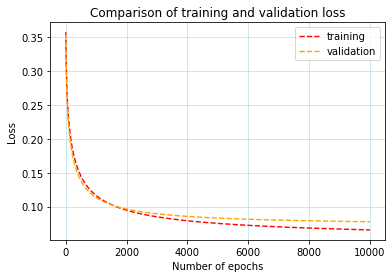

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [10]:
plt.plot(range(epochs), loss_train, color='red', linestyle='dashed', linewidth=1.4, label='training')
plt.plot(range(epochs), loss_val, color='orange', linestyle='dashed', linewidth=1.4, label='validation')
plt.grid(color='#ADD8E6', linestyle='-', linewidth=0.6)
plt.title('Comparison of training and validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.savefig('train_vs_val_loss.jpg', format='jpg', dpi=1000)
plt.show()
plt.figure()

### Comparing accuracy for training and validation sets

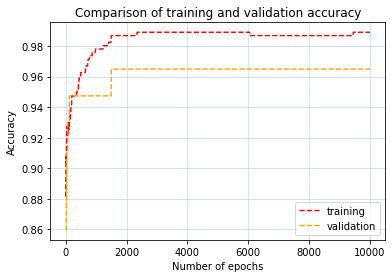

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:
plt.plot(range(epochs), accuracy_train, color='red', linestyle='dashed', linewidth=1.4, label='training')
plt.plot(range(epochs), accuracy_val, color='orange', linestyle='dashed', linewidth=1.4, label='validation')
plt.grid(color='#ADD8E6', linestyle='-', linewidth=0.6)
plt.title('Comparison of training and validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('train_vs_val_accuracy.jpg', format='jpg', dpi=1000)
plt.show()
plt.figure()

### Plotting accuracy, precision, recall and F1 score on test set

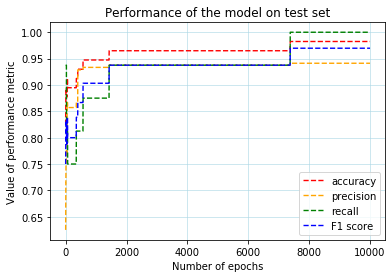

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(range(epochs), accuracy_test, color='red', linestyle='dashed', linewidth=1.4, label='accuracy')
plt.plot(range(epochs), precision_test, color='orange', linestyle='dashed', linewidth=1.4, label='precision')
plt.plot(range(epochs), recall_test, color='green', linestyle='dashed', linewidth=1.4, label='recall')
plt.plot(range(epochs), f1_score_test, color='blue', linestyle='dashed', linewidth=1.4, label='F1 score')
plt.grid(color='#ADD8E6', linestyle='-', linewidth=0.6)
plt.title('Performance of the model on test set')
plt.xlabel('Number of epochs')
plt.ylabel('Value of performance metric')
plt.legend(loc='lower right')
plt.savefig('performance_test.jpg', format='jpg', dpi=1000)
plt.show()
plt.figure()

### Predicting output labels for test data

In [13]:
# Y_pred_train = predict_labels(X_train, W, b)
# Y_pred_val = predict_labels(X_val, W, b)
Y_pred_test = predict_labels(X_test, W, b)

### Evaluating the logistic regression model

#### F1 Score

In [14]:
# print("F1 Score on the training set -", get_f1_score(Y_train[0], Y_pred_train[0]))
# print("F1 Score on the validation set -", get_f1_score(Y_val[0], Y_pred_val[0]))
print("F1 Score on the test set -", get_f1_score(Y_test[0], Y_pred_test[0]))

F1 Score on the test set - 0.9696969696969697


#### Accuracy

In [15]:
# print("Accuracy on the training set -", get_accuracy(Y_train[0], Y_pred_train[0]))
# print("Accuracy on the validation set -", get_accuracy(Y_val[0], Y_pred_val[0]))
print("Accuracy on the test set -", get_accuracy(Y_test[0], Y_pred_test[0]))

Accuracy on the test set - 0.9824561403508771


#### Precision

In [16]:
# print("Precision on the training set -", get_precision(Y_train[0], Y_pred_train[0]))
# print("Precision on the validation set -", get_precision(Y_val[0], Y_pred_val[0]))
print("Precision on the test set -", get_precision(Y_test[0], Y_pred_test[0]))

Precision on the test set - 0.9411764705882353


#### Recall

In [17]:
# print("Recall on the training set -", get_recall(Y_train[0], Y_pred_train[0]))
# print("Recall on the validation set -", get_recall(Y_val[0], Y_pred_val[0]))
print("Recall on the test set -", get_recall(Y_test[0], Y_pred_test[0]))

Recall on the test set - 1.0


#### Confusion Matrix

In [18]:
# print("Training set: Confusion Matrix -", get_confusion_matrix(Y_train[0], Y_pred_train[0]))
# print("Validation set: Confusion Matrix -", get_confusion_matrix(Y_val[0], Y_pred_val[0]))
print("Test set: Confusion Matrix -", get_confusion_matrix(Y_test[0], Y_pred_test[0]))

Test set: Confusion Matrix - [[40  1]
 [ 0 16]]
